In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

39000


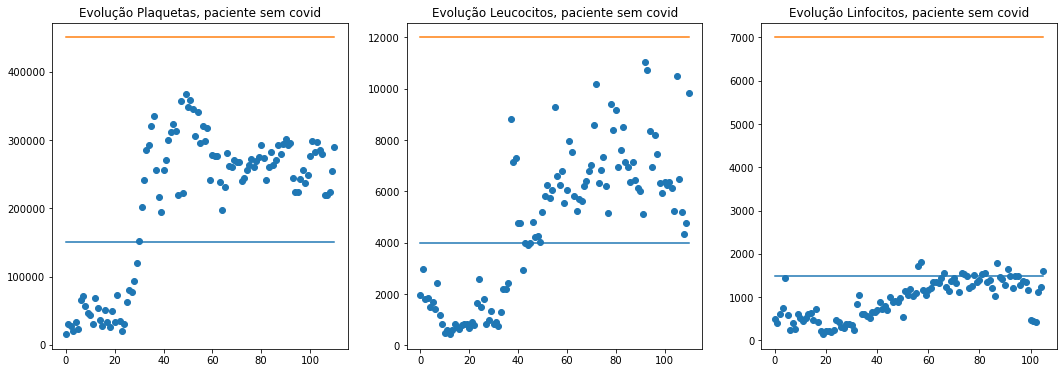

In [ ]:
# pacientes_unico = data[data["ID_PACIENTE"] == "B8E5614AFF218E3A"]
# pacientes_unico.head(100)
# pacientes_unico = pacientes_unico.drop_duplicates(subset=["DE_EXAME"])
# pacientes_unico.sort_values(by=["DT_COLETA"])
#Linfocitos,Leucocitos,Plaquetas

# A2CD4F9678833EE3, B8E5614AFF218E3A

# pacientes_unico = data[data["ID_PACIENTE"] == "B8E5614AFF218E3A"]
# pacientes_unico.head(300)

lista_pacientes = data.ID_PACIENTE.unique().tolist()
lista = []
aux = 0
print(len(lista_pacientes))
for numero_paciente in lista_pacientes:
        lista_pacientes.remove(numero_paciente)
        if(aux>3000):
            break
        fig, ax = plt.subplots(1, 3, figsize=(18,6))
        try:
            numero_paciente = "A2CD4F9678833EE3"
            pacientes_unico = data[data["ID_PACIENTE"] == numero_paciente]
            pacientes_unico = pacientes_unico[pacientes_unico["DE_EXAME"] == "Hemograma completo, sangue total"]
            pacientes_unico = pacientes_unico[pacientes_unico["DE_ANALITO"].isin(["Plaquetas"])]
            pacientes_unico["DT_COLETA"] = pd.to_datetime(pacientes_unico["DT_COLETA"],format = "%d/%m/%Y")
            pacientes_unico = pacientes_unico.sort_values(by="DT_COLETA",ascending=True)
            Plaquetas_time_series = pacientes_unico.DE_RESULTADO.values
            Plaquetas_time_series = pd.to_numeric(Plaquetas_time_series)

            ax[0].set_title("Evolução Plaquetas, paciente com covid")
            ax[0].scatter([i for i in range(len(Plaquetas_time_series))],Plaquetas_time_series)
            ax[0].plot([i for i in range(len(Plaquetas_time_series))],[150000 for i in range(len(Plaquetas_time_series))])
            ax[0].plot([i for i in range(len(Plaquetas_time_series))],[450000 for i in range(len(Plaquetas_time_series))])

            pacientes_unico = data[data["ID_PACIENTE"] == numero_paciente]
            pacientes_unico = pacientes_unico[pacientes_unico["DE_EXAME"] == "Hemograma completo, sangue total"]
            pacientes_unico = pacientes_unico[pacientes_unico["DE_ANALITO"].isin(["Leucocitos"])]
            pacientes_unico["DT_COLETA"] = pd.to_datetime(pacientes_unico["DT_COLETA"],format = "%d/%m/%Y")
            pacientes_unico = pacientes_unico.sort_values(by="DT_COLETA",ascending=True)
            Leucocitos_time_series = pacientes_unico.DE_RESULTADO.values
            Leucocitos_time_series = pd.to_numeric(Leucocitos_time_series)

            ax[1].set_title("Evolução Leucocitos, paciente com covid")
            ax[1].scatter([i for i in range(len(Leucocitos_time_series))],Leucocitos_time_series)
            ax[1].plot([i for i in range(len(Leucocitos_time_series))],[4000 for i in range(len(Leucocitos_time_series))])
            ax[1].plot([i for i in range(len(Leucocitos_time_series))],[12000 for i in range(len(Leucocitos_time_series))])

            pacientes_unico = data[data["ID_PACIENTE"] == numero_paciente]
            pacientes_unico = pacientes_unico[pacientes_unico["DE_EXAME"] == "Hemograma completo, sangue total"]
            pacientes_unico = pacientes_unico[pacientes_unico["DE_ANALITO"].isin(["Linfocitos"])]
            pacientes_unico["DT_COLETA"] = pd.to_datetime(pacientes_unico["DT_COLETA"],format = "%d/%m/%Y")
            pacientes_unico = pacientes_unico.sort_values(by="DT_COLETA",ascending=True)
            Linfocitos_time_series = pacientes_unico.DE_RESULTADO.values
            Linfocitos_time_series = pd.to_numeric(Linfocitos_time_series)
            lista.append([numero_paciente,Plaquetas_time_series.mean(),Leucocitos_time_series.mean(),Linfocitos_time_series.mean()])
            ax[2].set_title("Evolução Linfocitos, paciente com covid")
            ax[2].scatter([i for i in range(len(Linfocitos_time_series))],Linfocitos_time_series)
            ax[2].plot([i for i in range(len(Linfocitos_time_series))],[1500 for i in range(len(Linfocitos_time_series))])
            ax[2].plot([i for i in range(len(Linfocitos_time_series))],[7000 for i in range(len(Linfocitos_time_series))])
            plt.show()
            aux += 1
        except:
            print("erro")
        break
dataframe = pd.DataFrame(lista)
dataframe.to_csv("/home/rose/Área de Trabalho/pesq2/dados/teste.csv")



In [4]:
aux = pd.read_csv("/home/rose/Área de Trabalho/pesq2/dados/teste.csv")
aux2 = pd.read_csv("/home/rose/Área de Trabalho/pesq2/dados/bsps.csv",sep = "|", on_bad_lines="skip")



In [6]:
aux2 = aux2[["ID_PACIENTE","SITUAÇÃO_COVID"]].drop_duplicates()
aux2 = aux2.merge(aux,left_on= "ID_PACIENTE",right_on= "ID_PACIENTE")
aux2 = aux2[["ID_PACIENTE","SITUAÇÃO_COVID","1","2","3"]].dropna()
aux2.to_csv("/home/rose/Área de Trabalho/pesq2/dados/classifydata.csv")

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
data[data["DE_EXAME"] == "Sorologia para Trial - Coronavirus, IgA"].head(100)
aux = data["DE_RESULTADO"][data["DE_EXAME"] == "Sorologia para Trial - Coronavirus, IgA"]
label,value = [],[]
for i in aux:
    try:
        i = float(i.replace(",","."))
        value.append(i)
    except ValueError:
        label.append(i)

colors = []
for present_label in label: 
    if present_label == "NAO REAGENTE":
        colors.append("blue")
    elif present_label == "REAGENTE":
        colors.append("red")
    else:
        colors.append("gray")

plt.ylim(0,5)
plt.scatter([i for i in range(len(value))],value,c = colors)
plt.show()

ValueError: 'c' argument has 2154 elements, which is inconsistent with 'x' and 'y' with size 2088.

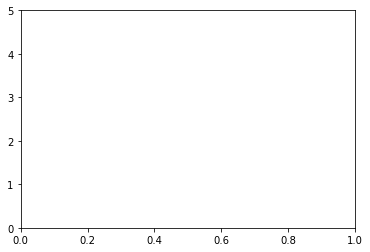

In [74]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
data[data["DE_EXAME"] == "Sars-Cov-2, Anticorpos Igm E Igg Por Quimiluminescencia, Soro"].head(100)
aux = data[["DE_RESULTADO","DE_ANALITO"]][data["DE_EXAME"] == "Sars-Cov-2, Anticorpos Igm E Igg Por Quimiluminescencia, Soro"]
aux = aux[aux["DE_ANALITO"].isin(["Covid 19, Anticorpos IgG, Quimioluminescencia","Covid 19, Anticorpos IgG, Quimiolumin.-Indice"])]
aux = aux["DE_RESULTADO"]
label,value = [],[]
for i in aux:
    try:
        i = float(i.replace(",","."))
        value.append(i)
    except ValueError:
        label.append(i)

colors = []
for present_label in label: 
    if present_label == "NAO REAGENTE":
        colors.append("blue")
    elif present_label == "REAGENTE":
        colors.append("red")
    elif:
        colors.append("gray")

plt.ylim(0,5)
plt.scatter([i for i in range(len(value))],value,c = colors)
plt.show()

In [24]:
dado_label = data[data["DE_EXAME"].isin(lista_exames)]


In [23]:
label_positivas = ["DETECTADO","DETECTADO (POSITIVO)","REAGENTE","Amostra REAGENTE para IgM e IgG contra SARS-CoV-2,","Amostra REAGENTE para IgM contra SARS-CoV-2","Amostra REAGENTE para IgG contra SARS-CoV-2, em apenas uma metodologia,","Amostra REAGENTE para anticorpos contra SARS-CoV-2,","Detectados anticorpos da classe IgG contra SARS-CoV-2, Este perfil e compativel com infeccao pregressa, Estudos mostram que, sobretudo em pessoas que apresentaram quadro clinico leve ou nao apresentaram sintomas, os niveis de anticorpos podem diminuir ao longo do tempo, podendo inclusive, tornar-se negativos, O papel destes anticorpos na protecao contra reinfeccao nao e completamente estabelecido,"]
label_negativa = ["NAO DETECTADO","NAO DETECTADO (NEGATIVO)","NAO REAGENTE","Amostra NAO REAGENTE para anticorpos contra SARS-CoV-2",]
dado_label.DE_RESULTADO.unique()

array(['NAO DETECTADO', 'DETECTADO', 'NAO DETECTADO (NEGATIVO)',
       'DETECTADO (POSITIVO)',
       'A dinamica de producao de anticorpos na COVID-19 ainda nao e bem estabelecida, especialmente em pacientes que nao apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, o momento da soroconversao pode ser variavel de individuo para individuo, podendo ser afetado pelo quadro clinico apresentado, O resultado sugere que ja tenham transcorrido mais de 3 semanas desde a infeccao aguda, A capacidade protetora dos anticorpos da classe IgG nao e completamente estabelecida, ',
       'Evidencia sorologica de infeccao pregressa por SARS-CoV-2,',
       'REAGENTE', 'NAO REAGENTE', '0,32', '0,19', 'Inconclusivo',
       'Amostra REAGENTE para IgG contra SARS-CoV-2,', '2,9', '62,2',
       'Detectados anticorpos da classe IgG contra SARS-CoV-2, Este perfil e compativel com infeccao pregressa, Estudos demonstram que, sobretudo em pessoas que apresentaram quadro clinico leve ou nao apres

In [14]:
dado = pd.read_csv("/home/rose/Área de Trabalho/pesq2/dados/bpsp.csv",on_bad_lines='skip',sep = "|")
dado.head()

/tmp/ipykernel_37763/1410021728.py:1: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dado = pd.read_csv("/home/rose/Área de Trabalho/pesq2/dados/bpsp.csv",on_bad_lines='skip',sep = "|")


ID_PACIENTE  ID_ATENDIMENTO DT_COLETA DE_ORIGEM DE_EXAME DE_ANALITO  \
0         NaN             NaN       NaN       NaN      NaN        NaN   
1         NaN             NaN       NaN       NaN      NaN        NaN   
2         NaN             NaN       NaN       NaN      NaN        NaN   
3         NaN             NaN       NaN       NaN      NaN        NaN   
4         NaN             NaN       NaN       NaN      NaN        NaN   

  DE_RESULTADO CD_UNIDADE DE_VALOR_REFERENCIA  SITUAÇÃO_COVID  
0          NaN        NaN                 NaN             NaN  
1          NaN        NaN                 NaN             NaN  
2          NaN        NaN                 NaN             NaN  
3          NaN        NaN                 NaN             NaN  
4          NaN        NaN                 NaN             NaN